## Working with the Global Power Plants Database (Prep Phase Capstone Analytic Report)
### Robin Fladebo

In [3]:
import pandas as pd
pd.set_option('display.max_rows', 1000)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (20.0, 10.0)

## Data preparation and exploration

In [4]:
pplantstmp = pd.read_csv('../Datafiles/globalpowerplantdatabasev110/global_power_plant_database.csv')                    

How many rows and columns are in this dataset?

In [23]:
pplantstmp.shape

(28664, 22)

What columns are in the original datafile?

In [24]:
list(pplantstmp.columns.values)

['country',
 'country_long',
 'name',
 'gppd_idnr',
 'capacity_mw',
 'latitude',
 'longitude',
 'fuel1',
 'fuel2',
 'fuel3',
 'fuel4',
 'commissioning_year',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'estimated_generation_gwh']

Read the power plants csv file into a dataframe with selected columns

In [25]:
#Read the csv into a dataframe with just selected columns
powerplants = pd.read_csv('../Datafiles/globalpowerplantdatabasev110/global_power_plant_database.csv', usecols = ['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw', 'fuel1', 'fuel2', 'fuel3', 'fuel4', 'year_of_capacity_data', 'estimated_generation_gwh'])                    

Make sure I didn't inadvertently drop any rows

In [26]:
powerplants.shape[0]

28664

The read_csv operation creates a dataframe. What are the datatypes in this dataframe?

In [27]:
print(powerplants.dtypes)

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
fuel1                        object
fuel2                        object
fuel3                        object
fuel4                        object
year_of_capacity_data       float64
estimated_generation_gwh    float64
dtype: object


#Confirming that I can perform string operations on a datatype 'object'

In [28]:
powerplants['country_long'].str.replace("n","N").head(10)

0    AfghaNistaN
1    AfghaNistaN
2    AfghaNistaN
3    AfghaNistaN
4    AfghaNistaN
5    AfghaNistaN
6    AfghaNistaN
7        AlbaNia
8        AlbaNia
9        AlbaNia
Name: country_long, dtype: object

Make a quick visual inspection of the data in the dataframe

In [29]:
powerplants.head(10)

,country,country_long,name,gppd_idnr,capacity_mw,fuel1,fuel2,fuel3,fuel4,year_of_capacity_data,estimated_generation_gwh
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.00,Hydro,NaN,NaN,NaN,2017.0,NaN
1,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.00,Hydro,NaN,NaN,NaN,2017.0,NaN
2,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.00,Hydro,NaN,NaN,NaN,2017.0,NaN
3,AFG,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,GEODB0040536,11.55,Hydro,NaN,NaN,NaN,2017.0,NaN
4,AFG,Afghanistan,Northwest Kabul Power Plant Afghanistan,GEODB0040540,42.00,Gas,NaN,NaN,NaN,2017.0,NaN
5,AFG,Afghanistan,Pul-e-Khumri Hydroelectric Power Plant Afghani...,GEODB0040537,6.00,Hydro,NaN,NaN,NaN,2017.0,NaN
6,AFG,Afghanistan,Sarobi Dam Hydroelectric Power Plant Afghanistan,GEODB0040535,22.00,Hydro,NaN,NaN,NaN,2017.0,NaN
7,ALB,Albania,Bistrica 1,WRI1002169,27.00,Hydro,NaN,NaN,NaN,NaN,89.132075
8,ALB,Albania,Fierza,WRI1002170,500.00,Hydro,NaN,NaN,NaN,NaN,1650.593990
9,ALB,Albania,Koman,WRI1002171,600.00,Hydro,NaN,NaN,NaN,NaN,1980.712788


Test to ascertain that there is only one row per powerplant (no duplicates)

In [30]:
powerplants.shape[0] == powerplants["gppd_idnr"].nunique()

True

Add a column with capacity in GW

In [31]:
powerplants['capacity_gw'] = powerplants['capacity_mw']*0.0010
powerplants['capacity_gw_log'] = np.log(powerplants['capacity_gw'])

Exploration: Total number of power plants in the dataset for the top and bottom 10 countries

In [32]:
print(powerplants.country_long.value_counts().head(10))

print(powerplants.country_long.value_counts().tail(10))

United States of America    8119
China                       2901
United Kingdom              2567
Brazil                      2340
France                      2018
Canada                      1154
Germany                      980
India                        845
Spain                        613
Portugal                     462
Name: country_long, dtype: int64
Kosovo            2
Eritrea           2
Zimbabwe          2
Luxembourg        2
Liberia           2
Mongolia          2
Lesotho           1
Guinea-Bissau     1
Western Sahara    1
Djibouti          1
Name: country_long, dtype: int64


## Analytical Questions and Data Visualization

Describe the dataset by capacity in gigawatts (GW) for each type of fuel contained in fuel1 column

In [33]:
powerplants['capacity_gw'].groupby(powerplants['fuel1']).describe()

,count,mean,std,min,25%,50%,75%,max
fuel1,,,,,,,,
Biomass,1290.0,0.023610,0.048225,0.0010,0.002900,0.009000,0.025000,0.6450
Coal,2172.0,0.856423,0.841763,0.0012,0.240000,0.600000,1.200000,5.5000
Cogeneration,43.0,0.106395,0.277872,0.0016,0.007500,0.031900,0.073550,1.4040
Gas,3068.0,0.384458,0.565588,0.0010,0.033550,0.158500,0.550050,8.8680
Geothermal,186.0,0.067479,0.121389,0.0010,0.018000,0.030000,0.077750,1.2730
Hydro,7034.0,0.148687,0.559175,0.0010,0.005309,0.020000,0.093225,22.5000
Nuclear,199.0,2.053329,1.300090,0.0200,1.092000,1.845000,2.663350,8.2120
Oil,2925.0,0.163409,0.444947,0.0010,0.003400,0.015400,0.098000,6.7940
Other,36.0,0.060836,0.058299,0.0045,0.018775,0.040000,0.097250,0.2885


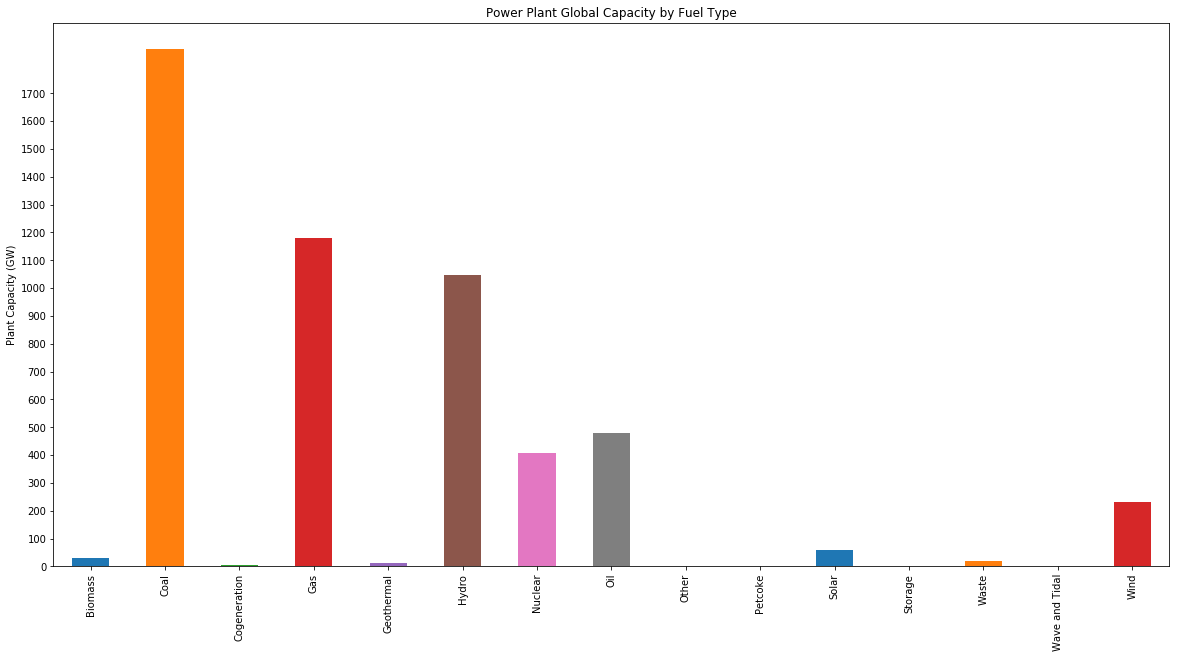

In [34]:
powerplants.groupby('fuel1').capacity_gw.sum().plot(kind = "bar")
plt.xlabel("")
plt.ylabel('Plant Capacity (GW)')
plt.yticks(np.arange(0, 1800, step=100))
plt.title('Power Plant Global Capacity by Fuel Type');

There is a lot of variability in the capacity of plants regardless of the fuel type. Nuclear power plants have the highest mean capacity; there are relatively few nuclear plants, but they all have high generating capacity as compared to other fuel types. Because of this variability, capacity is shown using a logarithmic scale.

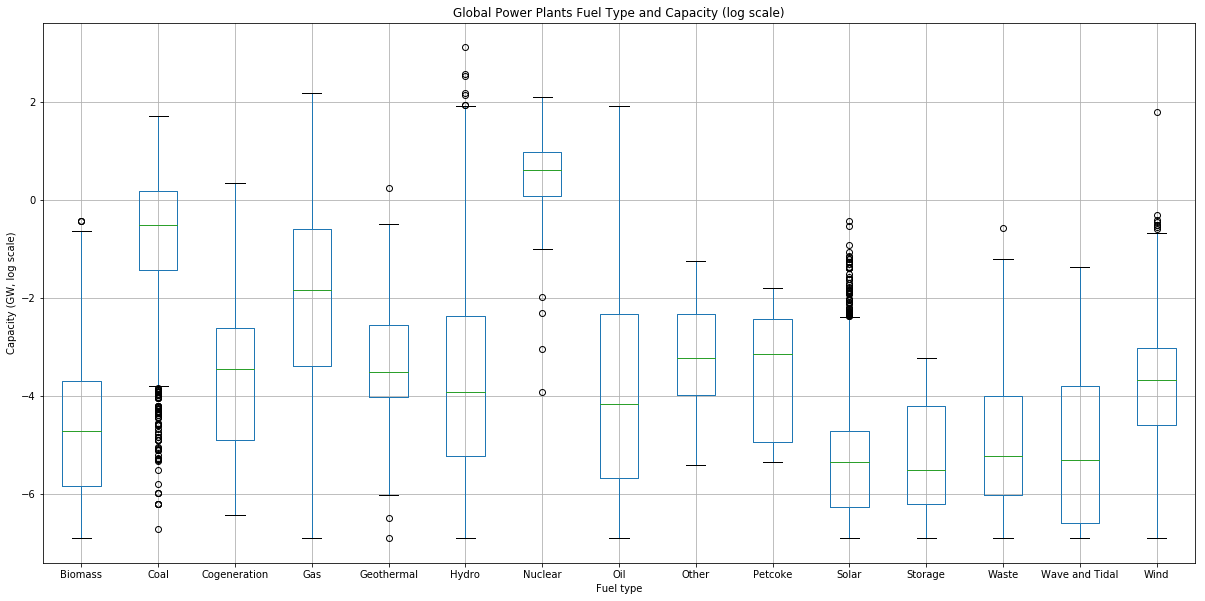

In [35]:
#Variability in capacity based on fuel type, using log scale
powerplants.boxplot(column = 'capacity_gw_log', by = 'fuel1' )
plt.xlabel('Fuel type')
plt.ylabel('Capacity (GW, log scale)')
plt.title('Global Power Plants Fuel Type and Capacity (log scale)')
plt.suptitle("")
plt.show()

Some plants have more than one fuel type. See discussion of this element in the "Data Limitations" section of the accompanying report.

In [36]:
print('Plants with value for Fuel 1: ' + str(powerplants['fuel1'].count()) + '\n' + 'Plants with value for Fuel 2: ' + str(powerplants['fuel2'].count()) + '\n' + 'Plants with value for Fuel 3: ' + str(powerplants['fuel3'].count()) + '\n' + 'Plants with value for Fuel 4: ' + str(powerplants['fuel4'].count())) 

Plants with value for Fuel 1: 28661
Plants with value for Fuel 2: 1705
Plants with value for Fuel 3: 296
Plants with value for Fuel 4: 108



Note: It appears as if 3 records do not have a value for Fuel 1. 

In [37]:
print(pd.DataFrame(powerplants.loc[powerplants['fuel1'].isnull()], columns=('country', 'capacity_mw', 'fuel1', 'fuel2', 'fuel3', 'fuel4')))             

     country  capacity_mw fuel1 fuel2 fuel3 fuel4
8475     FJI         2.98   NaN   NaN   NaN   NaN
8481     FJI        80.00   NaN   NaN   NaN   NaN
8482     FJI         6.00   NaN   NaN   NaN   NaN


An example of the mix of fuel types that occurs in this dataset when a plant uses more than one fuel.

In [38]:
#Exploration: Plants that have 4 fuel types
print(pd.DataFrame(powerplants.loc[powerplants['fuel4'].notnull()], columns=('country', 'capacity_mw', 'fuel1', 'fuel2', 'fuel3', 'fuel4')))               

      country  capacity_mw         fuel1    fuel2    fuel3    fuel4
19712     GBR         35.0  Cogeneration     Coal    Waste      Gas
20295     USA          4.0         Waste      Gas      Oil    Other
20299     USA         48.0         Waste      Oil      Gas  Biomass
20496     USA        180.0          Coal    Waste    Other  Biomass
20532     USA        156.5          Coal    Waste      Gas  Biomass
20680     USA         67.2          Coal    Waste    Other      Gas
20694     USA          7.1           Oil      Gas  Biomass    Solar
20800     USA       1884.5          Coal  Petcoke      Oil      Gas
20974     USA         63.2         Waste    Other      Gas  Biomass
20997     USA       1707.3          Coal  Petcoke      Oil      Gas
21074     USA         72.2         Waste      Oil      Gas  Biomass
21090     USA         69.4         Waste      Oil      Gas  Biomass
21305     USA         52.5          Coal    Waste      Oil  Biomass
21508     USA         67.0          Coal  Petcok

The countries with the highest total generating capacity.

In [39]:
top10_cap = powerplants['capacity_gw'].groupby(powerplants['country_long']).sum().reset_index().sort_values('capacity_gw',ascending=False).head(10)
top10_cap.rename(columns={'capacity_gw':'total_capacity_gw'}, inplace = True)
print(top10_cap)

                 country_long  total_capacity_gw
30                      China        1237.478380
155  United States of America        1183.855550
67                      India         273.030131
75                      Japan         210.594750
124                    Russia         182.752000
19                     Brazil         145.788471
26                     Canada         143.455200
52                     France         109.333329
57                    Germany         108.429775
134               South Korea          93.391780


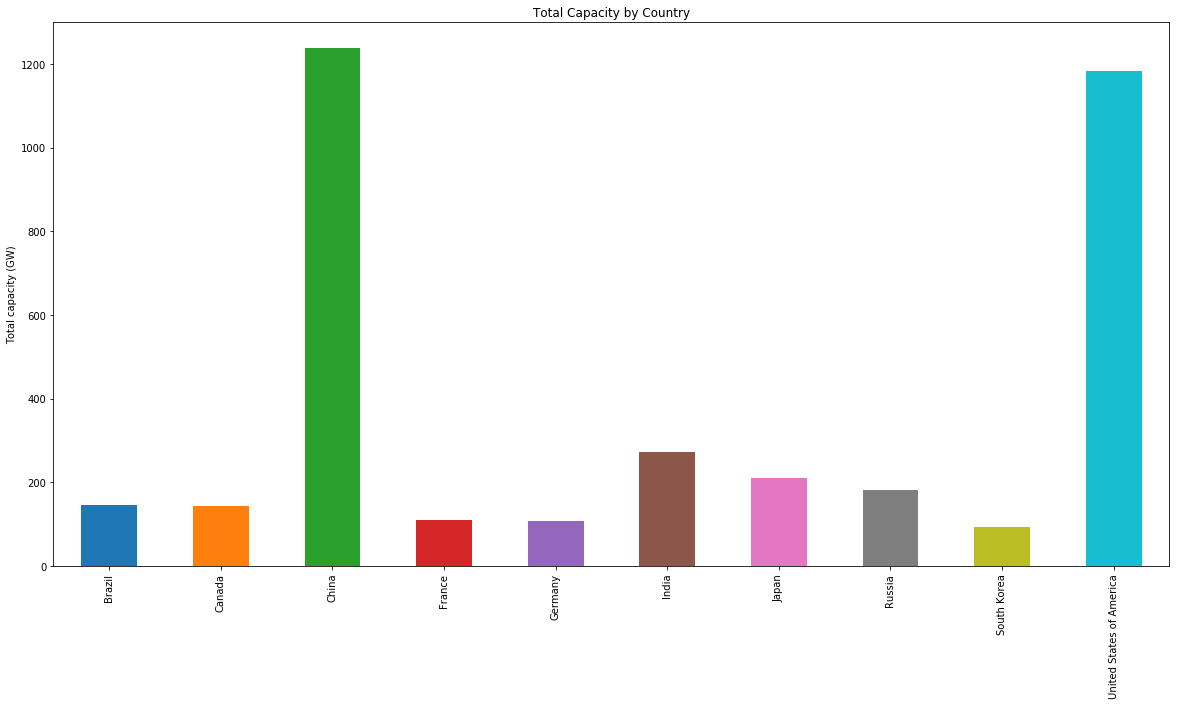

In [40]:
top10_cap.groupby('country_long').total_capacity_gw.mean().plot(kind = "bar")
plt.xlabel("")
plt.ylabel('Total capacity (GW)')
plt.title('Total Capacity by Country');

In [41]:
cntry_x_fuel = powerplants['capacity_gw'].groupby([powerplants['country_long'], powerplants['fuel1']]).sum().reset_index()

What is the fuel mix for each of the 10 countries with the highest generating capacity?

Brazil and Canada have a high proportion of hydropower. About 67% the capacity in both India and China is coal-fueled, while 57% of France's generating capacity is nuclear. 41% of Russian power plants are gas-powered. The US relies on coal and gas for more than half of it's generating capacity.

In [42]:
#Merge 2 dataframes: the capacity by fuel by country with the total capacity by country
top10_cap2 = pd.merge(top10_cap, cntry_x_fuel, on='country_long')
top10_cap2['percent_capacity'] = (top10_cap2['capacity_gw'] / top10_cap2['total_capacity_gw']) * 100
top10_cap2.sort_values(by=['country_long','percent_capacity'], inplace=True)
top10_w_fuel = top10_cap2[['country_long', 'fuel1', 'percent_capacity']].copy()

In [43]:
#Pivot the top10 fuel dataframe so all fuel types are columns
top10fuel_pivot = top10_w_fuel.pivot(index='country_long', columns = 'fuel1') ['percent_capacity']

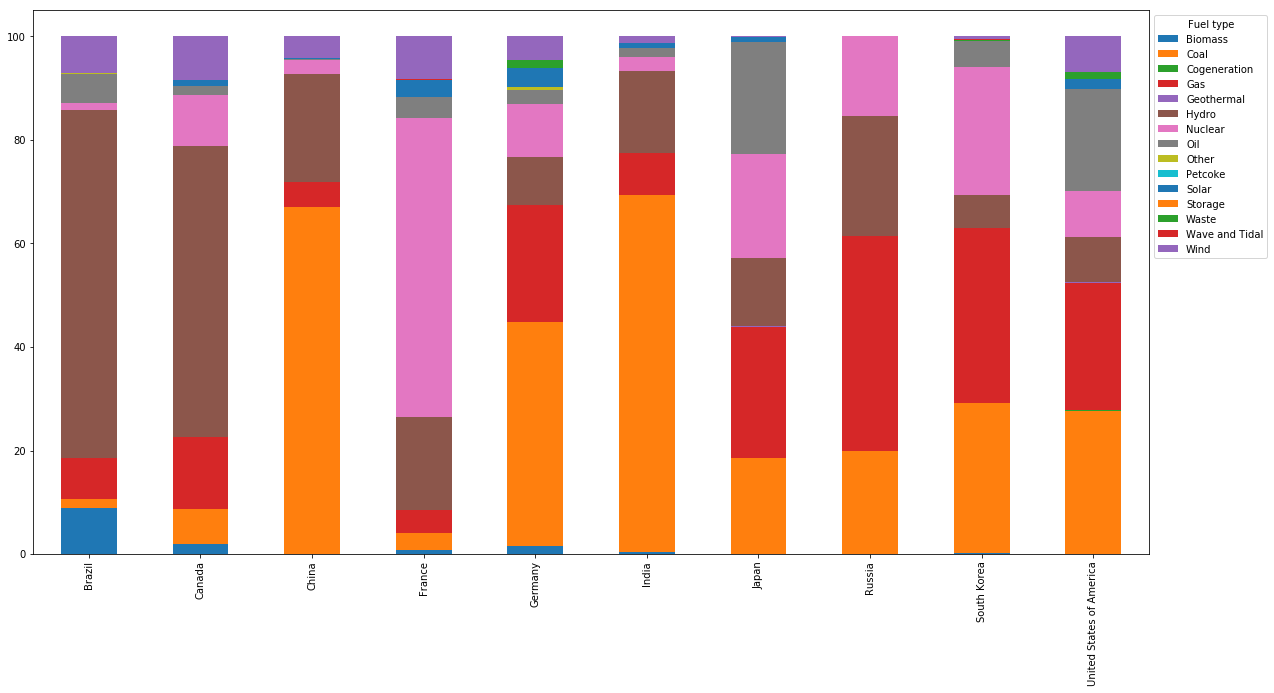

In [44]:
#Make a percent stacked bar chart of capacity by fuel type by country
#Bars represent country (N=10). Segments of bar represent fuel types. The y axis is 0 - 100 percent
top10fuel_pivot.plot(kind='bar', stacked=True)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), title='Fuel type')
plt.xlabel("")
plt.suptitle("")
plt.show();